<a href="https://colab.research.google.com/github/leninadarsh/leninadarsh/blob/main/milestone4_BOI23622086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/Traffic.csv')  # Replace with actual dataset path


In [ ]:
# Encode 'Traffic Situation'
label_encoder = LabelEncoder()
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

# Select relevant columns for prediction
features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']
data = data[features]

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare input sequences for LSTM
sequence_length = 3  # Use the last 3 time steps for prediction
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 4])  # Predicting 'Total'

X, y = np.array(X), np.array(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 50)               │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0305 - val_loss: 0.0195
Epoch 2/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0167 - val_loss: 0.0145
Epoch 3/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0165 - val_loss: 0.0152
Epoch 4/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0162 - val_loss: 0.0140
Epoch 5/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0147 - val_loss: 0.0143
Epoch 6/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0157 - val_loss: 0.0139
Epoch 7/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0165 - val_loss: 0.0142
Epoch 8/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 9/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 10/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0142 - val_loss: 0.0149
Epoch 11/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0139 - val_loss: 0.0142
Epoch 12/50
1189/1189 ━━━━━━━━

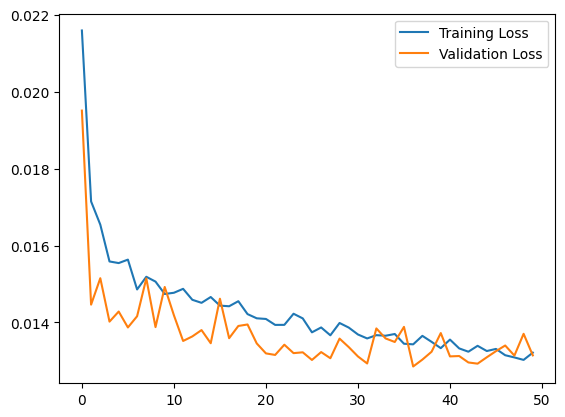

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Predicting 'Total'
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions
y_pred_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 4)), y_pred, np.zeros((y_pred.shape[0], 1))), axis=1))[:, 4]
y_test_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))), axis=1))[:, 4]

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: {mean_absolute_error(y_test_rescaled, y_pred_rescaled)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
MAE: 21.64348680126567
RMSE: 29.581211625797472


In [ ]:
model.save('lstm_traffic_model.h5')


In [ ]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# Load the LSTM model
model = load_model('lstm_traffic_model.h5')

# Load the scaler
scaler = pickle.load(open('scaler.pkl', 'rb'))
